First, let's load our libraires. We'll be using matplotlib.

In [1]:
import matplotlib.pyplot as plt
# This Jupyter magic function will draw out charts right into the notebook
%matplotlib inline

Matplotlib takes in data as lists. Let's make the simplest chart possible using a small list.

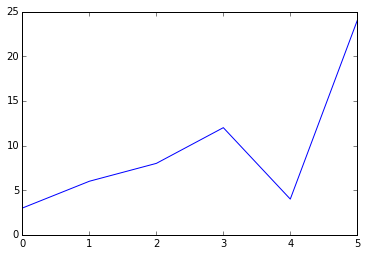

In [3]:
data = [3,6,8,12,4,24]
plt.plot(data)

If you only feed Matplotlib one list, it will assume the numbers are on the y axis. It will generate an x axis with the index of each y value. Let's give it x values now.

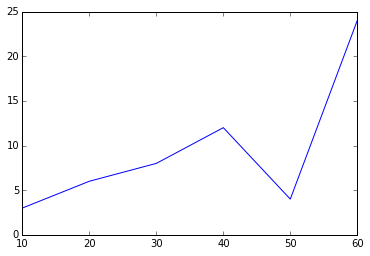

In [5]:
x = [10, 20, 30, 40, 50, 60]
plt.plot(x, data)

As you can see, when you pass in two lists, the x axis values must come first. 

Now this chart isn't very informative. Lets' give it a title and axis labels.

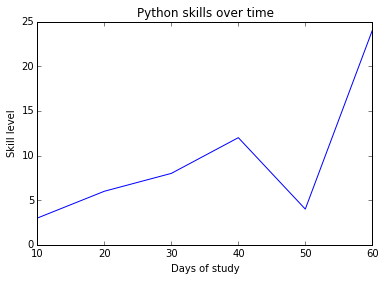

In [6]:
plt.plot(x, data)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

You know what, these charts are pretty ugly. Thankfully, Matplotlib comes with a few preset styles. Let's list them all.

In [7]:
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


I like the FiveThirtyEight style. Let's use that. But I want a dotted red line instead.

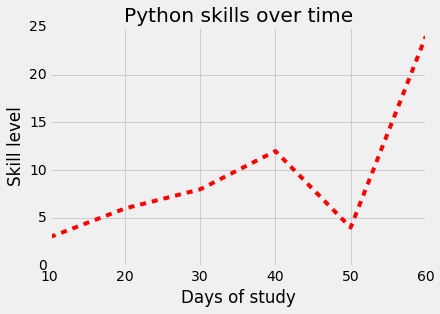

In [10]:
plt.style.use('fivethirtyeight')
plt.plot(x, data, 'r--')  # Adds marker color snd style
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

Actually, I think I prefer green squares.

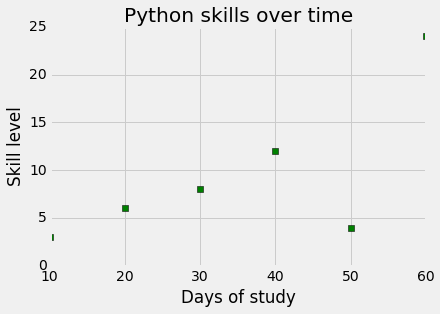

In [11]:
plt.plot(x, data, 'gs')
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

Here's a [handy reference](http://matplotlib.org/api/markers_api.html) for all the possible markers you can use in Matplotlib.
But now some of the points are outside the chart limits. So let's fix our limits.

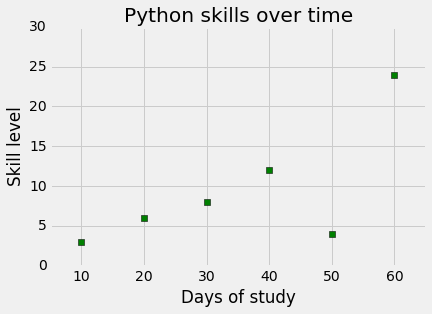

In [15]:
plt.plot(x, data, 'gs')
plt.xlim(5, 65) # lowest and highest values on the scale
plt.ylim(0, 30)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

That drop on the 50th day? It stands out. Let's explain it with an annotation. And let's go back to a blue line.

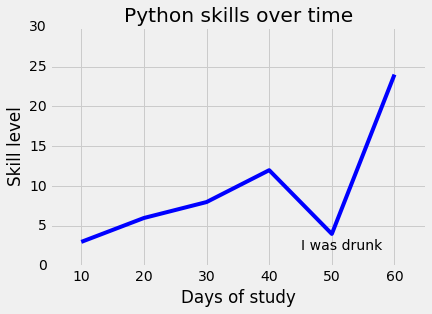

In [18]:
plt.plot(x, data, 'b-')
plt.xlim(5, 65)
plt.ylim(0, 30)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")
plt.text(45, 2, "I was drunk")  # x position, y position, text

OK, so we can make pretty annotated line charts with fake data. Wahoo. What we really want is to load in real data and get insights out of it. For this, we'll use pandas, a powerful data analysis library that's very good at importing data from text files, like a CSV.

Let's load in some data on the emissions of air pollutants by businesses in Colorado. [Source: EPA](http://www3.epa.gov/airquality/airdata/ad_data.html)

In [19]:
import pandas as pd

# Load file into a pandas data frame and print the first 10 rows
df = pd.read_csv("co_air_quality.csv")
df.head(10)

,Facility Name,Facility Address,Nitrogen Oxides,PM10,PM2.5,Volatile Organic Compounds
0,.PETROLEUM DEV - SATER 11; 12; 21; 22-19,NW NW SEC 19 T4N R63W,1.759880,0.010000,0.010000,1.231880
1,1111 TOWER - FOUR SEASONS HOTEL,1111 14th St,7.730300,0.354318,0.354318,0.354318
2,31ST ST,Unknown,188.416000,4.942880,4.794590,12.031100
3,36TH ST,Unknown,159.948000,4.402070,4.270010,10.755400
4,910 GENERATION COMPANY,910 15TH ST STE 1050,11.160000,0.455400,0.435309,1.569100
5,A & S CONSTRUCTION CO. - ASPHALT,6200 COUNTY ROAD 107,8.150060,0.976910,0.413866,5.879524
6,ABSMEIER LANDSCAPING - MALOUFF,NE NE SEC 4 T36N R8E,0.400000,1.048201,0.415919,0.050000
7,ACA PRODUCTS; INC.,AVERY PIT,0.152334,12.418902,4.019908,0.217955
8,ACH FOAM TECHNOLOGIES-EPS PRODUCTS,5250 SHERMAN ST,2.720000,0.209200,0.174770,92.740000
9,ACME BRICK COMPANY,401 PRAIRIE HAWK DR,26.676000,11.758967,7.946095,3.045000


Pandas neatly loaded up the data and diplays it in a nice table format in iPython Notebooks. The data we're using is all ready for action. In the real world, you may need to clean and reshape the data to make it usable. Pandas is good for that, too.

Now let's rename our columns so we can use them more conveniently.

In [20]:
df.columns = ["name", "address", "NOx", "PM10", "PM25", "VOC"]
df.head()

,name,address,NOx,PM10,PM25,VOC
0,.PETROLEUM DEV - SATER 11; 12; 21; 22-19,NW NW SEC 19 T4N R63W,1.75988,0.010000,0.010000,1.231880
1,1111 TOWER - FOUR SEASONS HOTEL,1111 14th St,7.73030,0.354318,0.354318,0.354318
2,31ST ST,Unknown,188.41600,4.942880,4.794590,12.031100
3,36TH ST,Unknown,159.94800,4.402070,4.270010,10.755400
4,910 GENERATION COMPANY,910 15TH ST STE 1050,11.16000,0.455400,0.435309,1.569100


Now we can visualize data by simply calling in columns with dot notation. Let's look at a histogram of VOCs divided into 20 bins.

(array([  1.72200000e+03,   9.50000000e+01,   3.50000000e+01,
          1.30000000e+01,   7.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.20000000e-05,   3.49435885e+01,   6.98871649e+01,
          1.04830741e+02,   1.39774318e+02,   1.74717894e+02,
          2.09661471e+02,   2.44605047e+02,   2.79548624e+02,
          3.14492200e+02,   3.49435777e+02,   3.84379353e+02,
          4.19322929e+02,   4.54266506e+02,   4.89210082e+02,
          5.24153659e+02,   5.59097235e+02,   5.94040812e+02,
          6.28984388e+02,   6.63927965e+02,   6.98871541e+02]),
 <a list of 20 Patch objects>)

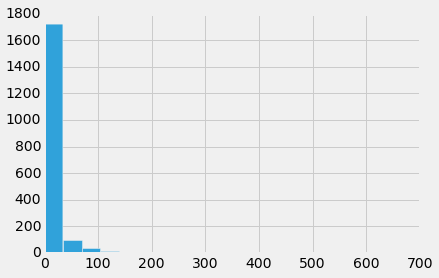

In [22]:
plt.hist(df.VOC, bins=20)

We see that the vast majority of rows are in the lower end of emissions, between 0 and 30. But there are a few heavy polluters. Let's see the distribution of a data another say, as a box plot.

{'boxes': [<matplotlib.lines.Line2D at 0x109916f90>],
 'caps': [<matplotlib.lines.Line2D at 0x109923e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x10993d190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x109931b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x109923150>,
  <matplotlib.lines.Line2D at 0x109923810>]}

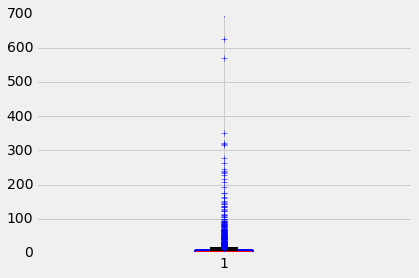

In [23]:
plt.boxplot(df.VOC)

The average value (long black line) is quite low, but the highest values are pretty huge, comparatively. 

Let's compare the boxplots of all the pollutants in the data. If we want to see charts side-by-side, matplot lets us create subplots in the same canvas.

{'boxes': [<matplotlib.lines.Line2D at 0x10b43bf10>],
 'caps': [<matplotlib.lines.Line2D at 0x10b433ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b16be90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b1b6990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10b4331d0>,
  <matplotlib.lines.Line2D at 0x10b433890>]}

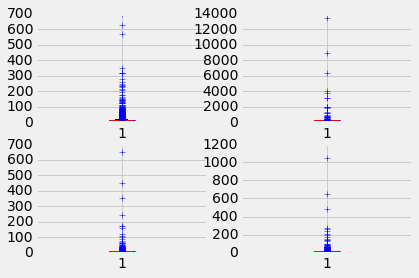

In [31]:
# First, create the canvas for the four charts
fig = plt.figure()

# Then create the subplots. 
# The three numbers you pass to add_subplot are: number of rows, number of columns,
# and which plot in this grid you're defining. So 221 means a canvas with two across, two down. 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Now make the plot you want for each

ax1.boxplot(df.VOC)
ax2.boxplot(df.NOx)
ax3.boxplot(df.PM25)
ax4.boxplot(df.PM10)

Similar distributions across all pollutants. Now let's make a bar chart of the top 10 pollutants.